In [36]:
import os
import glob
from dask.distributed import progress
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
archive = '/projects/0/nwo2021025/archive/mres_b.e10.B2000_CAM5.f05_t12.001/'

In [5]:
#os.listdir(archive+'ice/hist/')

### last file 2067-07

In [17]:
dsl = xr.open_dataset(archive+'ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.2067-07.nc')

In [4]:
print(archive+'ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.2067-07.nc')

/projects/0/nwo2021025/archive/mres_b.e10.B2000_CAM5.f05_t12.001/ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.2067-07.nc


In [24]:
os.mkdir('/scratch-shared/jasperdj/cice')

In [5]:
!ls -lh  /projects/0/nwo2021025/archive/mres_b.e10.B2000_CAM5.f05_t12.001/ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.2067-07.nc

-rw-r----- 1 renew1 nwo2021025 4.7G Mar 20 12:47 /projects/0/nwo2021025/archive/mres_b.e10.B2000_CAM5.f05_t12.001/ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.2067-07.nc


In [14]:
dsl.sel(ni=dsl.ni[::4]).sel(nj=dsl.nj[::4]).to_netcdf('/scratch-shared/jasperdj/cice/mres.cice.2067-07.nc')

### first ten years

In [6]:
files = sorted(glob.glob(archive+'ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.20??-07.nc'))[:10]

In [7]:
ds = xr.open_mfdataset(files)

In [8]:
ds = ds.sel(ni=ds.ni[::4], nj=ds.nj[::4]).where(ds.time.dt.month==8, drop=True).mean('time', keep_attrs=True).load()

In [16]:
ds.to_netcdf('/scratch-shared/jasperdj/cice/mres.cice.2045-2055.07.nc')

In [19]:
dsl = dsl.sel(ni=dsl.ni[::4]).sel(nj=dsl.nj[::4])

In [37]:
dds = (dsl.squeeze(drop=True) - ds.squeeze(drop=True))

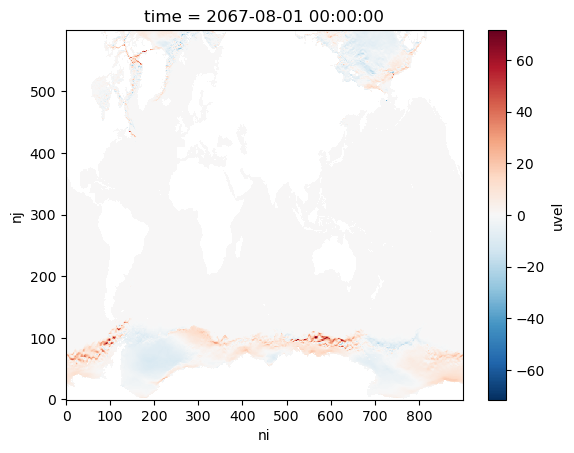

In [22]:
%matplotlib inline

(dsl - ds).uvel.squeeze().plot()
plt.show()

In [54]:
os.mkdir('/scratch-shared/jasperdj/cice/end-start/')

In [72]:
%matplotlib inline
for v in dds.variables:
    if 'nj' in dds[v].dims and 'ni' in dds[v].dims:
        attrs = ','.join(dsl[v].attrs.values())
        if 'U grid' in attrs or 'U cell' in attrs or 'uarea' in attrs or 'umask' in attrs:
            try:
                ax = plt.axes()
                dds[v].plot(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/end-start/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        elif 'T grid' in attrs or 'T cell' in attrs or 'tarea' in attrs or v=='tmask':
            try:
                ax = plt.axes()
                dds[v].plot.pcolormesh(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/end-start/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        else:
            print(v, attrs)
        print(v)

TLON
TLAT
ULON
ULAT
tmask
tarea
uarea
dxt
dyt
dxu
dyu
HTN
HTE
ANGLE
ANGLET
lont_bounds longitude boundaries of T cells,degrees_east
lont_bounds
latt_bounds latitude boundaries of T cells,degrees_north
latt_bounds
lonu_bounds
latu_bounds
hi
hs
fs
Tsfc
aice
qi
qs
uvel
vvel
transix
transiy
fswdn
fswup
flwdn
snow
snow_ai
rain
rain_ai
fswfac
fswabs
fswabs_ai
alvdr
alidr
alvdf
alidf
albice
albsno
albpnd
coszen
flat
flat_ai
fsens
fsens_ai
flwup
flwup_ai
evap
evap_ai
Tair
Tref
Qref
congel
frazil
snoice
meltt
meltb
meltl
melts
fresh
fresh_ai
fsalt
fsalt_ai
fhocn
fhocn_ai
fswthru
fswthru_ai
strairx
strairy
strcorx
strcory
strocnx
strocny
strintx
strinty
strength
opening
divu
shear
sig1
sig2
dvidtt
dvidtd
daidtt
daidtd
dardg1dt
dardg2dt
dvirdgdt
hisnap
aisnap
trsig
ice_present
fsurf_ai
fcondtop_ai
aicen001
aicen002
aicen003
aicen004
aicen005
vicen001
vicen002
vicen003
vicen004
vicen005
iage
FYarea
aerosnossl001
aerosnoint001
aeroicessl001
aeroiceint001
aerosnossl002
aerosnoint002
aeroicessl002
ae

In [73]:
os.mkdir('/scratch-shared/jasperdj/cice/end/')

In [75]:
dsl = dsl.squeeze(drop=True)

TLON
TLAT
ULON
ULAT
tmask
tarea
uarea
dxt
dyt
dxu
dyu
HTN
HTE
ANGLE
ANGLET
lont_bounds longitude boundaries of T cells,degrees_east
lont_bounds
latt_bounds latitude boundaries of T cells,degrees_north
latt_bounds
lonu_bounds
latu_bounds
hi
hs
fs
Tsfc
aice
qi
qs
uvel
vvel
transix
transiy
fswdn
fswup
flwdn
snow
snow_ai
rain
rain_ai
fswfac
fswabs
fswabs_ai
alvdr
alidr
alvdf
alidf
albice
albsno
albpnd
coszen
flat
flat_ai
fsens
fsens_ai
flwup
flwup_ai
evap
evap_ai
Tair
Tref
Qref
congel
frazil
snoice
meltt
meltb
meltl
melts
fresh
fresh_ai
fsalt
fsalt_ai
fhocn
fhocn_ai
fswthru
fswthru_ai
strairx
strairy
strcorx
strcory
strocnx
strocny
strintx
strinty
strength
opening
divu
shear
sig1
sig2
dvidtt
dvidtd
daidtt
daidtd
dardg1dt
dardg2dt
dvirdgdt
hisnap
aisnap
trsig
ice_present
fsurf_ai
fcondtop_ai
aicen001
aicen002
aicen003
aicen004
aicen005
vicen001
vicen002
vicen003
vicen004
vicen005
iage
FYarea
aerosnossl001
aerosnoint001
aeroicessl001
aeroiceint001
aerosnossl002
aerosnoint002
aeroicessl002
ae

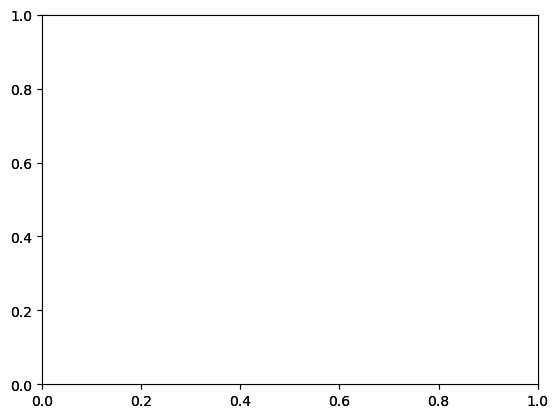

In [79]:
%matplotlib inline
for v in dsl.variables:
    if f'mres.{v}.png' in os.listdir('/scratch-shared/jasperdj/cice/end/'):
        print(v)
        continue
    if 'nj' in dsl[v].dims and 'ni' in dsl[v].dims:
        attrs = ','.join(dsl[v].attrs.values())
        if 'U grid' in attrs or 'U cell' in attrs or 'uarea' in attrs or 'umask' in attrs:
            try:
                ax = plt.axes()
                dsl[v].plot(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/end/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        elif 'T grid' in attrs or 'T cell' in attrs or 'tarea' in attrs or v=='tmask':
            try:
                ax = plt.axes()
                dsl[v].plot.pcolormesh(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/end/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        else:
            print(v, attrs)
        print(v)

In [ ]:
os.mkdir('/scratch-shared/jasperdj/cice/start/')

In [80]:
ds = ds.squeeze(drop=True)

In [ ]:
%matplotlib inline
for v in ds.variables:
    if f'mres.{v}.png' in os.listdir('/scratch-shared/jasperdj/cice/start/'):
        print(v,'already exists')
        continue
    if 'nj' in ds[v].dims and 'ni' in ds[v].dims:
        attrs = ','.join(ds[v].attrs.values())
        if 'U grid' in attrs or 'U cell' in attrs or 'uarea' in attrs or 'umask' in attrs:
            try:
                ax = plt.axes()
                ds[v].plot(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/start/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        elif 'T grid' in attrs or 'T cell' in attrs or 'tarea' in attrs or v=='tmask':
            try:
                ax = plt.axes()
                ds[v].plot.pcolormesh(ax=ax)
                plt.title(v)
                plt.savefig(f'/scratch-shared/jasperdj/cice/start/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(v, attrs)
        else:
            print(v, attrs)
        print(v)

tmask


In [4]:
os.listdir('/scratch-shared/jasperdj/cice/start/')

['mres.alidf.png',
 'mres.latu_bounds.png',
 'mres.Tsfc.png',
 'mres.dvidtd.png',
 'mres.fhocn_ai.png',
 'mres.fcondtop_ai.png',
 'mres.FYarea.png',
 'mres.aeroicessl001.png',
 'mres.vicen003.png',
 'mres.fsens_ai.png',
 'mres.strcorx.png',
 'mres.aeroiceint003.png',
 'mres.shear.png',
 'mres.vvel.png',
 'mres.faero_ocn002.png',
 'mres.strintx.png',
 'mres.fswthru.png',
 'mres.alvdf.png',
 'mres.snow_ai.png',
 'mres.aicen004.png',
 'mres.faero_ocn003.png',
 'mres.fhocn.png',
 'mres.tarea.png',
 'mres.flat.png',
 'mres.transiy.png',
 'mres.transix.png',
 'mres.opening.png',
 'mres.aeroicessl003.png',
 'mres.fswthru_ai.png',
 'mres.aerosnossl002.png',
 'mres.albice.png',
 'mres.qi.png',
 'mres.daidtt.png',
 'mres.ANGLET.png',
 'mres.daidtd.png',
 'mres.hi.png',
 'mres.strairy.png',
 'mres.ULAT.png',
 'mres.dxu.png',
 'mres.aicen005.png',
 'mres.melts.png',
 'mres.fswabs.png',
 'mres.strinty.png',
 'mres.aice.png',
 'mres.dvirdgdt.png',
 'mres.alidr.png',
 'mres.faero_atm003.png',
 'mres.

### all years

In [8]:
files = sorted(glob.glob(archive+'ice/hist/mres_b.e10.B2000_CAM5.f05_t12.001.cice.h.20??-07.nc'))
#files

In [9]:
ds = xr.open_mfdataset(files, parallel=True)

In [ ]:
%matplotlib inline

outdir = '/scratch-shared/jasperdj/cice/tseries'
if not os.path.exists(outdir):
    os.mkdir(outdir)

for v in ds.data_vars:
    if f'mres.{v}.png' in os.listdir(outdir):
        print(v,'already exists')
        continue
    if 'nj' in ds[v].dims and 'ni' in ds[v].dims:
        attrs = ','.join(ds[v].attrs.values())
        if 'U grid' in attrs or 'U cell' in attrs or 'uarea' in attrs or 'umask' in attrs:
            Z = ds[v].weighted(ds.uarea).mean(('nj','ni'), keep_attrs=True)
            try:
                ax = plt.axes()
                Z.plot(ax=ax)
                plt.title(v)
                plt.savefig(f'{outdir}/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(Z.dims, Z.shape)
                raise
                print(v, attrs)
        elif 'T grid' in attrs or 'T cell' in attrs or 'tarea' in attrs or v=='tmask':
            Z = ds[v].weighted(ds.tarea).mean(('nj','ni'), keep_attrs=True)
            try:
                ax = plt.axes()
                Z.plot(ax=ax)
                plt.title(v)
                plt.savefig(f'{outdir}/mres.{v}.png', dpi=200)
                plt.close()
            except ValueError:
                print(Z.dims, Z.shape)
                raise
                print(v, attrs)
        else:
            print(v, attrs)
        print(v)

tmask
tarea
uarea already exists
dxt
dyt
dxu already exists
dyu already exists
HTN
HTE
ANGLE already exists
ANGLET
lont_bounds already exists
latt_bounds
lonu_bounds
latu_bounds
hi
hs
fs
Tsfc
aice
qi
qs
uvel
vvel
transix
transiy
fswdn
fswup
flwdn
snow
snow_ai
rain
rain_ai
fswfac
fswabs
fswabs_ai
alvdr
alidr
alvdf
alidf
albice
albsno
albpnd
coszen
flat
flat_ai
fsens
fsens_ai
flwup
flwup_ai
evap
evap_ai
Tair
Tref
Qref
congel
frazil
snoice
meltt
meltb
meltl
melts
fresh
fresh_ai
fsalt


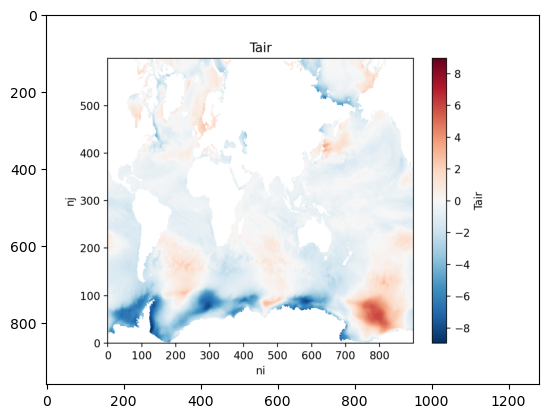

In [39]:
img = mpimg.imread('/scratch-shared/jasperdj/cice/end-start/mres.Tair.png')
plt.imshow(img)